In [39]:
## By Jennifer Hill, 2021
## Adapted from Akamatsu et al., 2020, eLife
## Plot average actin positions, orientations, etc for a group of simulations with the same parameters (single run group)

import pickle
import sys
import pandas as pd
import numpy as np
import os

# set directory path names
working_dir = '/Users/jenniferhill/Documents/tubeZsavio/experiments/'

output_name = 'endocytosis'

output_dir = working_dir + 'longbudtime_2000pN_lowxlinks_output_15967734/runs0000/'

figures_dir = output_dir + 'figures/'

os.chdir(working_dir)

# import actin plus/minus ends positions from CME_reporting_v2.ipynb
actin_ends = pd.read_pickle(output_dir+'/dataframes/actin_plus_minus_ends_recal.pkl')

# set to 'yes' to save figures in figures_dir
save_figures='yes'

# set to True for plots with black backgrounds
dark_plot_style=True

print('all dataframes loaded')

all dataframes loaded


## Set plot styles

In [40]:
import matplotlib.pyplot as plt  # plotting
if dark_plot_style == True:
    plt.style.use('dark_background')
else:
    plt.style.use('seaborn-v0_8-colorblind') # set plot style
plt.cool()                          # heatmap color scheme
%matplotlib inline

import seaborn as sns  # nicer plotting
sns.set_style('whitegrid')  # set plot style

from scipy.stats import binned_statistic_2d

SMALL_SIZE = 12
MEDIUM_SIZE = 18
BIGGER_SIZE = 20

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
  
import datetime
    
now = datetime.datetime.now()
date = now.strftime('%Y%m%d')
pref = date+'_'+output_name
print(pref)

20240313_endocytosis


<Figure size 640x480 with 0 Axes>

In [41]:
actin_ends.head()

fiber_id  length  minus_state  minus_xpos  minus_ypos  \
run          time id                                                          
run0000_0001 0.00 1          1   0.030            1    0.007437    0.010955   
                  2          2   0.030            1   -0.006675    0.004764   
                  3          3   0.030            1    0.005208    0.012901   
             0.03 1          1   0.060            1   -0.000975    0.005252   
                  3          3   0.055            1   -0.003659    0.002370   

                      minus_zpos  minus_xdir  minus_ydir  minus_zdir  \
run          time id                                                   
run0000_0001 0.00 1    -0.037047   -0.495833   -0.730365    0.469804   
                  2    -0.017440    0.445012   -0.317627   -0.837304   
                  3    -0.035608   -0.347219   -0.860043    0.373852   
             0.03 1    -0.030897    0.956770    0.255643    0.138703   
                  3    -0.030871    0.123596   -0.982640    0.138358   

                      plus_state  ...  plus_rpos  zdir_deg_flip90  \
run          time id              ...                               
run0000_0001 0.00 1            1  ...   0.013242       -28.021639   
                  2            1  ...   0.008201        56.856514   
                  3            1  ...   0.013912       -21.953377   
             0.03 1            1  ...   0.060121        -7.609746   
                  3            1  ...   0.051806        -7.555702   

                      minus_xpos_recal  minus_ypos_recal  minus_zpos_recal  \
run          time id                                                         
run0000_0001 0.00 1           7.437500          10.95550            7.0471   
                  2          -6.675180           4.76440          -12.5596   
                  3           5.208290          12.90060            5.6078   
             0.03 1           2.218346           0.69854            0.8973   
                  3          -0.465730          -2.18327            0.8706   

                      plus_xpos_recal  plus_ypos_recal  plus_zpos_recal  \
run          time id                                                      
run0000_0001 0.00 1          -7.43750        -10.95550          -7.0471   
                  2           6.67518         -4.76440          12.5596   
                  3          -5.20829        -12.90060          -5.6078   
             0.03 1          59.59276         16.27054          -7.2062   
                  3           6.42515        -56.25826          -6.4355   

                      plus_rpos_recal  minus_rpos_recal  
run          time id                                     
run0000_0001 0.00 1         13.241578         13.241578  
                  2          8.201069          8.201069  
                  3         13.912288         13.912288  
             0.03 1         61.774004          2.325729  
                  3         56.623973          2.232392  

[5 rows x 26 columns]

## Prepare actin dataframe

In [42]:
# label each fiber with its associated time and run
time, run = [], [] 

# associate a timepoint and run for each fiber throughout all simulations
for k, v in actin_ends.fiber_id.items(): 
    time.append(k[1])
    run.append(k[0])

# add times and runs lists to actin dataframe
actin_ends['Test_time'] = pd.Series(time, index=actin_ends.index)
actin_ends['Test_run'] = pd.Series(run, index=actin_ends.index)

# make lists for the individual time points and runs in the dataset
runs   = sorted(list(set(actin_ends.Test_run)), key = lambda x:int(x[-2:]))
times = sorted(list(set(actin_ends.Test_time)))

actin_ends

fiber_id  length  minus_state  minus_xpos  minus_ypos  \
run          time  id                                                           
run0000_0001 0.00  1           1  0.0300            1    0.007437    0.010955   
                   2           2  0.0300            1   -0.006675    0.004764   
                   3           3  0.0300            1    0.005208    0.012901   
             0.03  1           1  0.0600            1   -0.000975    0.005252   
                   3           3  0.0550            1   -0.003659    0.002370   
...                          ...     ...          ...         ...         ...   
run0000_0004 10.00 113       113  0.0600            1   -0.036062   -0.036716   
                   148       148  0.0600            1    0.020590    0.081242   
                   101       101  0.0600            1    0.009772    0.039943   
                   273       273  0.0575            1    0.087129   -0.088706   
                   190       190  0.0600            1    0.111312   -0.015028   

                        minus_zpos  minus_xdir  minus_ydir  minus_zdir  \
run          time  id                                                    
run0000_0001 0.00  1     -0.037047   -0.495833   -0.730365    0.469804   
                   2     -0.017440    0.445012   -0.317627   -0.837304   
                   3     -0.035608   -0.347219   -0.860043    0.373852   
             0.03  1     -0.030897    0.956770    0.255643    0.138703   
                   3     -0.030871    0.123596   -0.982640    0.138358   
...                            ...         ...         ...         ...   
run0000_0004 10.00 113   -0.006535    0.060877   -0.944149   -0.323847   
                   148    0.034682    0.087737    0.765596    0.637310   
                   101    0.043314   -0.120529    0.911117    0.394130   
                   273   -0.006419   -0.529348    0.798415   -0.286926   
                   190    0.050273    0.790142    0.063129    0.609666   

                        plus_state  ...  minus_xpos_recal  minus_ypos_recal  \
run          time  id               ...                                       
run0000_0001 0.00  1             1  ...          7.437500          10.95550   
                   2             1  ...         -6.675180           4.76440   
                   3             1  ...          5.208290          12.90060   
             0.03  1             1  ...          2.218346           0.69854   
                   3             1  ...         -0.465730          -2.18327   
...                            ...  ...               ...               ...   
run0000_0004 10.00 113           1  ...        -32.073180         -46.83020   
                   148           1  ...         24.578320          71.12820   
                   101           1  ...         13.760230          29.82880   
                   273           1  ...         91.118120         -98.82030   
                   190           1  ...        115.300720         -25.14200   

                        minus_zpos_recal  plus_xpos_recal  plus_ypos_recal  \
run          time  id                                                        
run0000_0001 0.00  1             7.04710         -7.43750        -10.95550   
                   2           -12.55960          6.67518         -4.76440   
                   3             5.60780         -5.20829        -12.90060   
             0.03  1             0.89730         59.59276         16.27054   
                   3             0.87060          6.42515        -56.25826   
...                                  ...              ...              ...   
run0000_0004 10.00 113         -23.46534        -29.99008       -104.37300   
                   148         -64.68190         30.31382        117.73670   
                   101         -73.31450          7.10441         84.06810   
                   273         -23.58067         61.51472        -51.43310   
                   190         -80.27280   

In [43]:
# growing vs capped ends
# filaments are "capped" when they reach 60 nm in length
growing_ends = actin_ends.loc[actin_ends['length']!=0.060] 
capped_ends  = actin_ends.loc[actin_ends['length']==0.060]

capped_ends

fiber_id  length  minus_state  minus_xpos  minus_ypos  \
run          time  id                                                           
run0000_0001 0.03  1           1    0.06            1   -0.000975    0.005252   
             0.06  1           1    0.06            1   -0.000523   -0.003631   
                   2           2    0.06            1   -0.004174   -0.001983   
                   3           3    0.06            1   -0.003709   -0.005936   
             0.09  1           1    0.06            1   -0.005369   -0.007106   
...                          ...     ...          ...         ...         ...   
run0000_0004 10.00 62         62    0.06            1   -0.014160    0.017299   
                   113       113    0.06            1   -0.036062   -0.036716   
                   148       148    0.06            1    0.020590    0.081242   
                   101       101    0.06            1    0.009772    0.039943   
                   190       190    0.06            1    0.111312   -0.015028   

                        minus_zpos  minus_xdir  minus_ydir  minus_zdir  \
run          time  id                                                    
run0000_0001 0.03  1     -0.030897    0.956770    0.255643    0.138703   
             0.06  1     -0.030843    0.531097   -0.151998    0.833566   
                   2     -0.030919   -0.781432    0.301801    0.546150   
                   3     -0.030928   -0.298404   -0.944594    0.136739   
             0.09  1     -0.030775    0.624570    0.711791    0.321351   
...                            ...         ...         ...         ...   
run0000_0004 10.00 62     0.019406   -0.205158    0.689170    0.694949   
                   113   -0.006535    0.060877   -0.944149   -0.323847   
                   148    0.034682    0.087737    0.765596    0.637310   
                   101    0.043314   -0.120529    0.911117    0.394130   
                   190    0.050273    0.790142    0.063129    0.609666   

                        plus_state  ...  minus_xpos_recal  minus_ypos_recal  \
run          time  id               ...                                       
run0000_0001 0.03  1             1  ...          2.218346           0.69854   
             0.06  1             1  ...          2.275862           0.21676   
                   2             1  ...         -1.374830           1.86491   
                   3             1  ...         -0.909800          -2.08788   
             0.09  1             1  ...          1.879560           1.00659   
...                            ...  ...               ...               ...   
run0000_0004 10.00 62            1  ...        -10.171480           7.18440   
                   113           1  ...        -32.073180         -46.83020   
                   148           1  ...         24.578320          71.12820   
                   101           1  ...         13.760230          29.82880   
                   190           1  ...        115.300720         -25.14200   

                        minus_zpos_recal  plus_xpos_recal  plus_ypos_recal  \
run          time  id                                                        
run0000_0001 0.03  1             0.89730         59.59276         16.27054   
             0.06  1             0.84350         34.00330         -8.93189   
                   2             0.91870        -48.17030         19.39301   
                   3             0.92750        -18.36700        -58.97889   
             0.09  1             0.77470         39.49676         43.55769   
...                                  ...              ...              ...   
run0000_0004 10.00 62          -49.40580        -20.32968         38.87140   
                   113         -23.46534        -29.99008       -104.37300   
                   148         -64.68190         30.31382        117.73670   
                   101         -73.31450          7.10441         84.06810   
                   190         -80.27280   

(array([    0.,     0.,   298.,  3633., 11704., 23859., 34752., 45659.,
        51453., 11477.]),
 array([-200., -178., -156., -134., -112.,  -90.,  -68.,  -46.,  -24.,
          -2.,   20.]),
 <BarContainer object of 10 artists>)

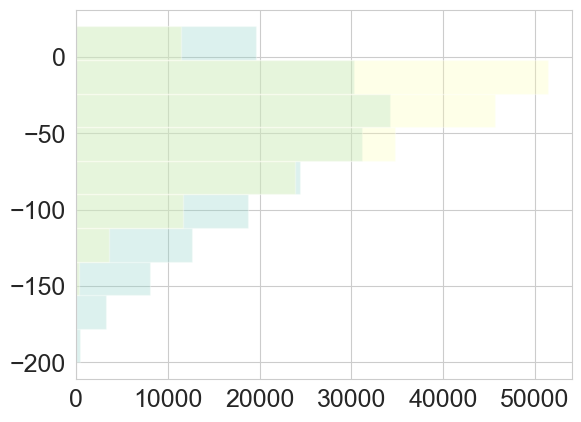

In [6]:
#HISTOGRAM OF Z POSITION OF PLUS AND MINUS ENDS

plt.hist(actin_ends.plus_zpos_recal, alpha = 0.3, range = [-200, 20], orientation = 'horizontal')
plt.hist(actin_ends.minus_zpos_recal, alpha = 0.3, range = [-200, 20], orientation = 'horizontal')

## Heat maps of all, plus, minus, growing, and capped ends

<Figure size 640x480 with 0 Axes>

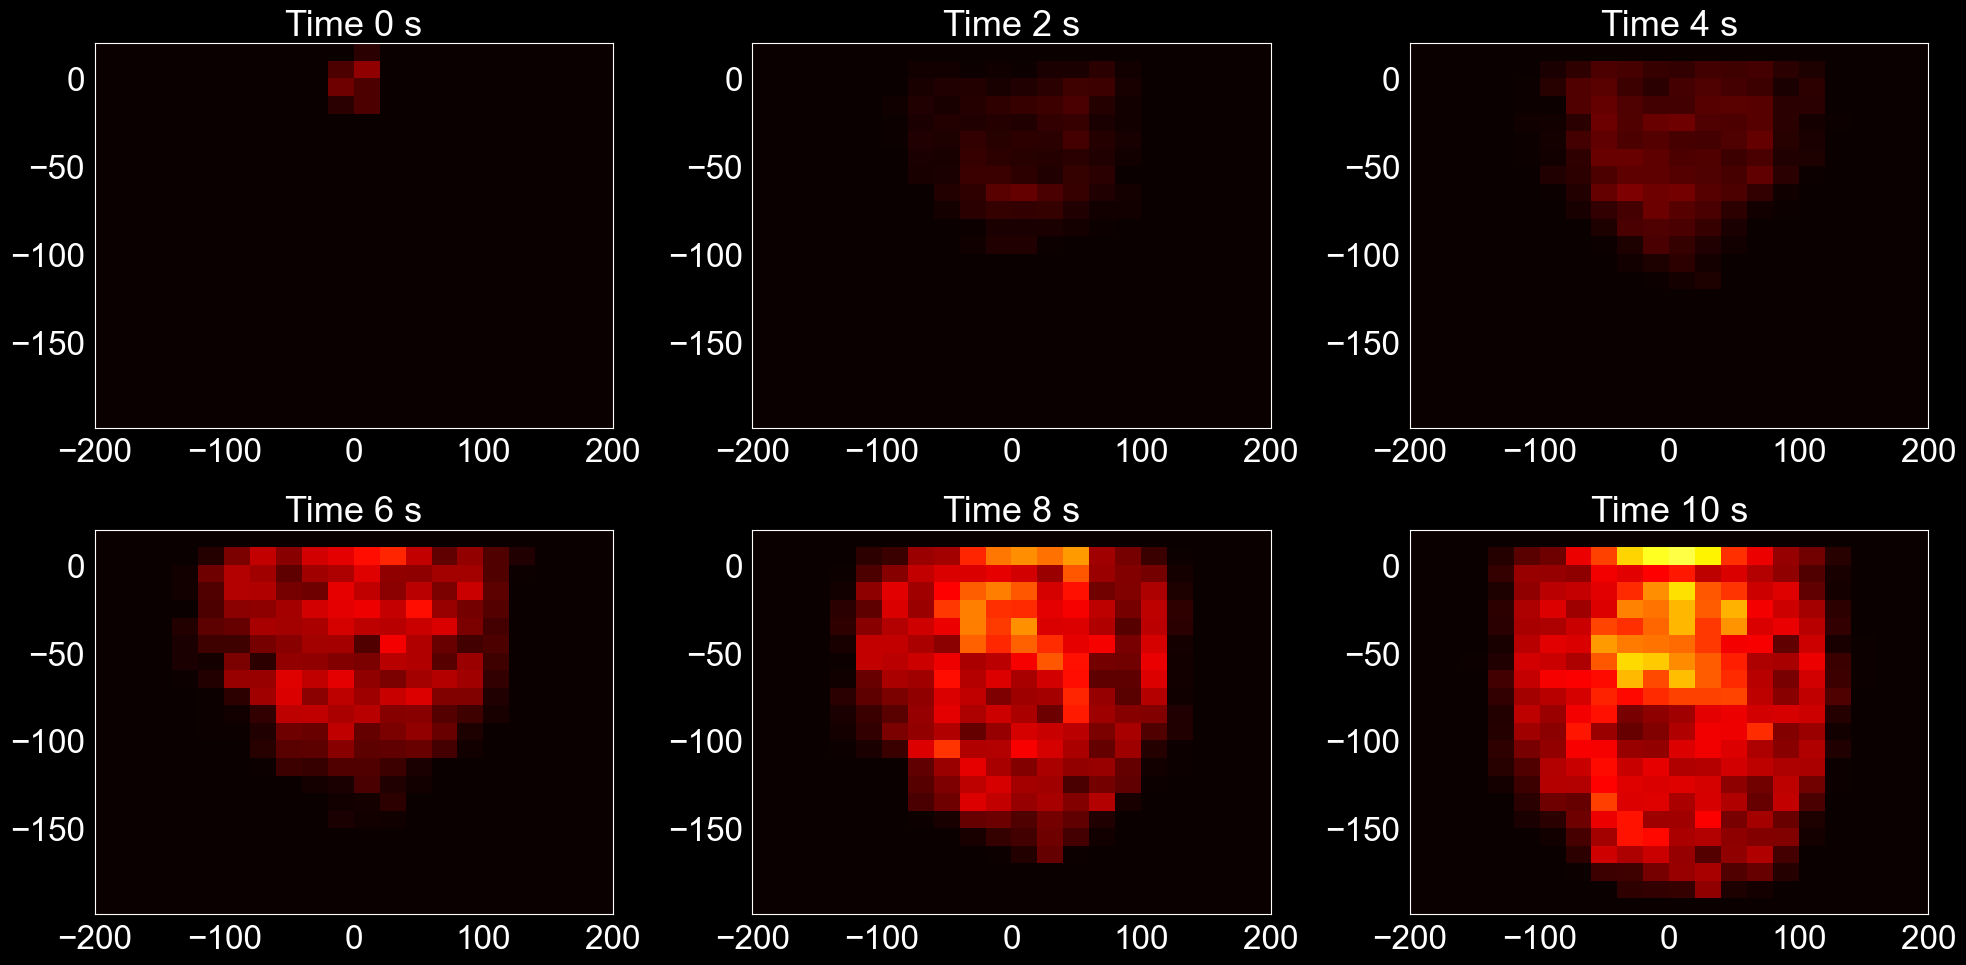

In [9]:
#ALL PLUS ENDS, MULTIPLE TIME POINTS

plt.colormaps.get_cmap('hot')
plt.set_cmap('hot')

fig = plt.figure(figsize=(20,10))

# plot one second intervals, show every other time point.

actin_ends_reindex = actin_ends.reset_index()

for i, timept in enumerate(range(0,11,2),start=0):

    # time bin is times in timepoint-1s to timepoint
    actin_ends_time=actin_ends_reindex.loc[actin_ends_reindex['time']>(timept-1)].loc[actin_ends_reindex['time']<=(timept)]
    
    # calculate # of unique runs in dataset and number of times in time bin
    runs = sorted(list(set(actin_ends_time.run)), key = lambda x:int(x[-2:]))
    times_per_timept=len(sorted(list(set(actin_ends_time.time))))

    # set number of bins in space (kind of like pixel size) here. 

    # x: 400 nm, 20 bins is 20 nm pixel.
    # z: 220 nm, 22 bin is 10 nm pixel

    model_points_plus,xs,ys=np.histogram2d(actin_ends_time.plus_xpos_recal,actin_ends_time.plus_zpos_recal,
                                           bins=[20,22],range=[[-200,200],[-200, 20]])
    model_points_plus=np.flipud(np.rot90(model_points_plus))    

    # histogram (sum) for one time

    # histogram shows total number of actin ends at that point in space, overcounts for repeated runs and multiple time points
    # mean actin in terms of run and time: just divide by number runs and nb time points in time bin
    
    model_points_plus=model_points_plus/len(runs)/times_per_timept

    # plot model points of plus ends
    
    plt.subplot(2, 3, i+1)

    plt.pcolormesh(xs, ys, model_points_plus)

    plt.title('Time ' + str(timept) + ' s', fontsize=26)

    plt.xlim([-200, 200])
    plt.ylim(bottom = -199)

    # max colormap to show
    plt.clim([0, 4])

    plt.xticks(size=24)
    plt.yticks(size=24)

    fig.set_tight_layout(True)

if save_figures == 'yes': 
    if dark_plot_style == True:
        plt.savefig(figures_dir+pref+'_plus_ends_map_XZ_time_subplots_dark.png')
        plt.savefig(figures_dir+pref+'_plus_ends_map_XZ_time_subplots_dark.pdf')
    else:
        plt.savefig(figures_dir+pref+'_plus_ends_map_XZ_time_subplots.png')
        plt.savefig(figures_dir+pref+'_plus_ends_map_XZ_time_subplots.pdf')

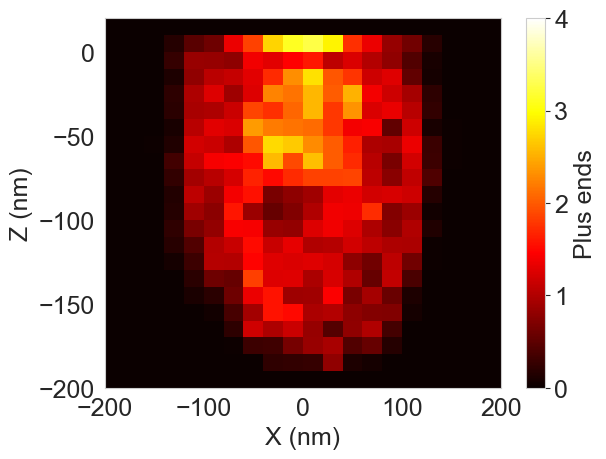

In [10]:
#ALL ENDS, FINAL TIME POINT

plt.figure()
plt.pcolormesh(xs, ys, model_points_plus)
plt.clim([0, 4])
plt.colorbar(label = 'Plus ends')
plt.xlabel('X (nm)')
plt.ylabel('Z (nm)')

if save_figures == 'yes': 
    if dark_plot_style == True:
        plt.savefig(figures_dir+pref+'_plus_ends_map_XZ_time_subplots_colorbar_dark.png')
    else:
        plt.savefig(figures_dir+pref+'_plus_ends_map_XZ_time_subplots_colorbar.png')

plt.show()

<Figure size 640x480 with 0 Axes>

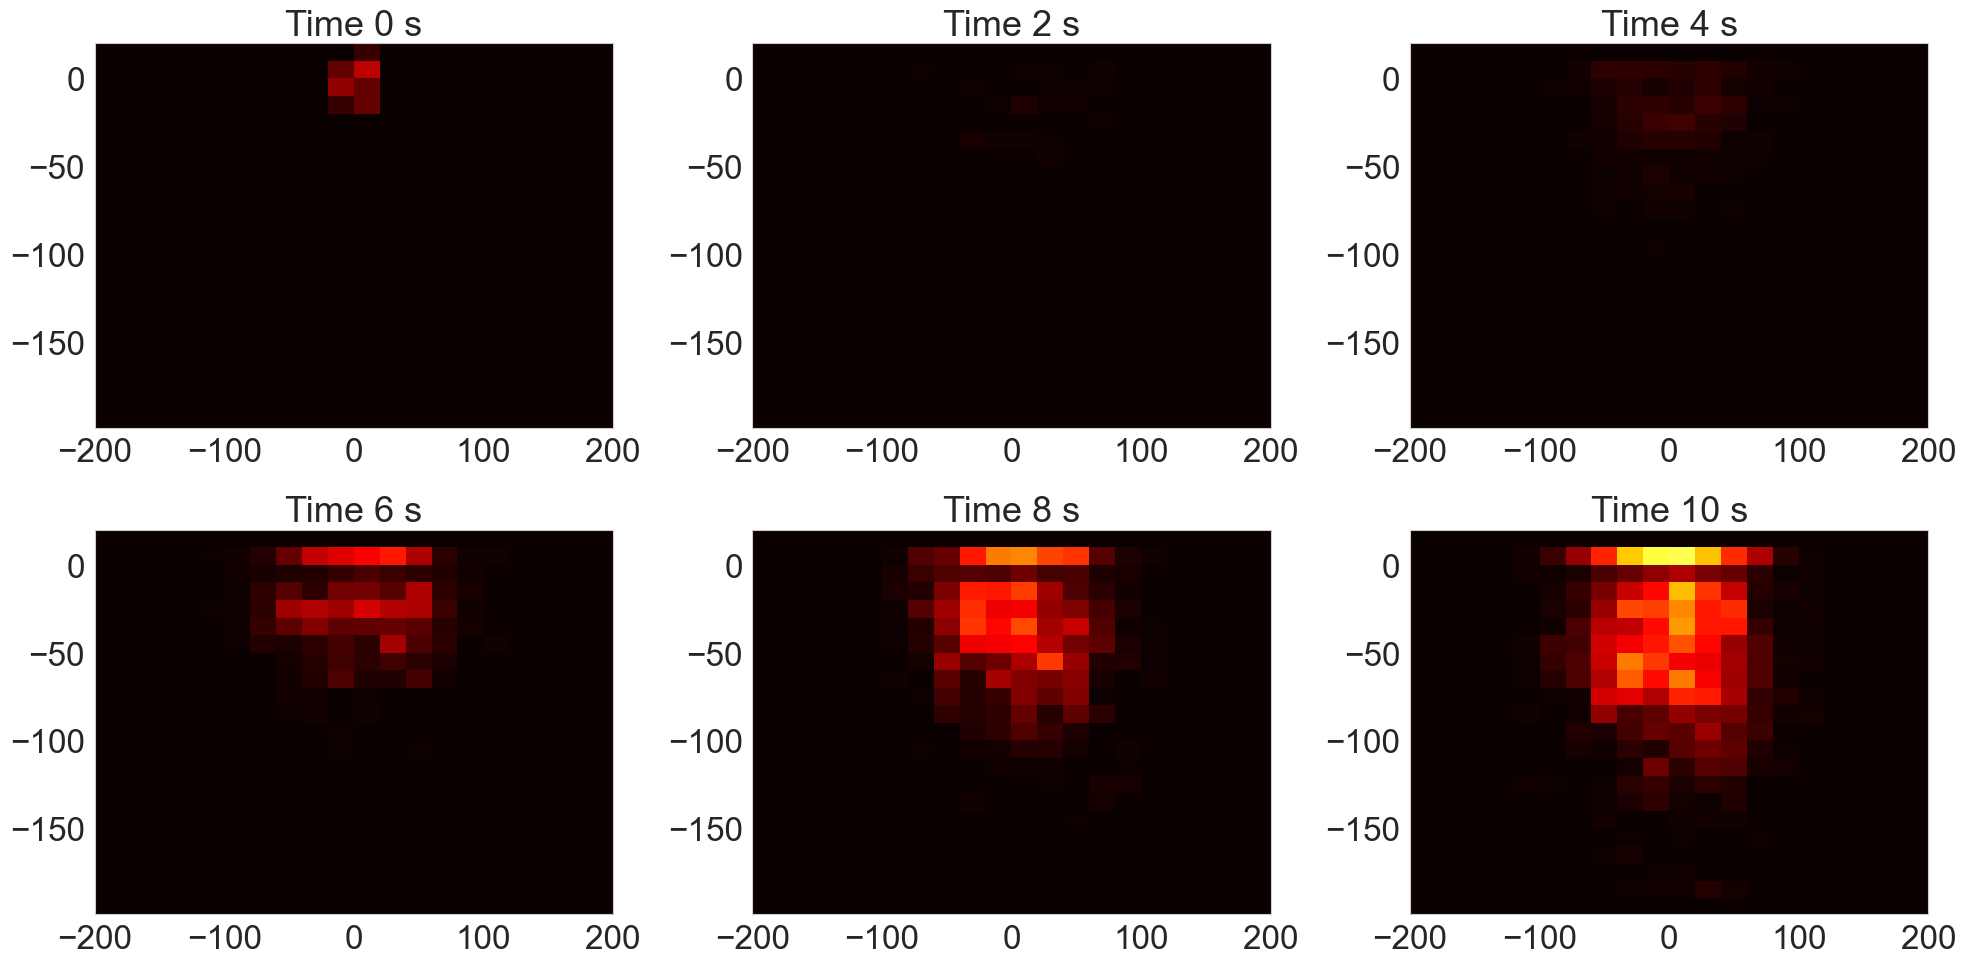

In [11]:
#GROWING ENDS, MULTIPLE TIME POINTS

plt.colormaps.get_cmap('hot')
plt.set_cmap('hot')

fig = plt.figure(figsize=(20,10))

# plot one second intervals, show every other time point.

growing_ends_reindex = growing_ends.reset_index()

for i, timept in enumerate(range(0,11,2),start=0):

    # time bin is times in timepoint-1s to timepoint
    growing_ends_time=growing_ends_reindex.loc[growing_ends_reindex['time']>(timept-1)].loc[growing_ends_reindex['time']<=(timept)]
    
    # calculate # of unique runs in dataset and number of times in time bin
    runs = sorted(list(set(growing_ends_time.run)), key = lambda x:int(x[-2:]))
    times_per_timept=len(sorted(list(set(growing_ends_time.time))))

    # set number of bins (kind of like pixel size) here. 

    # x: 400 nm, 20 bins is 20 nm pixel.
    # z: 220 nm, 22 bin is 10 nm pixel

    model_points_growing,xs,ys=np.histogram2d(growing_ends_time.plus_xpos_recal,growing_ends_time.plus_zpos_recal,
                                           bins=[20,22],range=[[-200,200],[-200, 20]])
    model_points_growing=np.flipud(np.rot90(model_points_growing))    

    # histogram (sum) for one time

    # histogram shows total number of actin ends at that point in space, overcounts for repeated runs and multiple time points
    # mean actin in terms of run and time: just divide by number runs and nb time points in time bin.

    model_points_growing=model_points_growing/len(runs)/times_per_timept

    # plot model points of growing ends
    
    plt.subplot(2, 3, i+1)

    plt.pcolormesh(xs, ys, model_points_growing)

    plt.title('Time ' + str(timept) + ' s', fontsize=26)

    plt.xlim([-200, 200])
    plt.ylim(bottom = -199)

    # max colormap to show
    plt.clim([0, 3])

    plt.xticks(size=24)
    plt.yticks(size=24)

    fig.set_tight_layout(True)

if save_figures == 'yes': 
    if dark_plot_style == True:
        plt.savefig(figures_dir+pref+'_growing_plus_ends_map_XZ_time_subplots_dark.png')
        plt.savefig(figures_dir+pref+'_growing_plus_ends_map_XZ_time_subplots_dark.pdf')
    else:
        plt.savefig(figures_dir+pref+'_growing_plus_ends_map_XZ_time_subplots.png')
        plt.savefig(figures_dir+pref+'_growing_plus_ends_map_XZ_time_subplots.pdf')

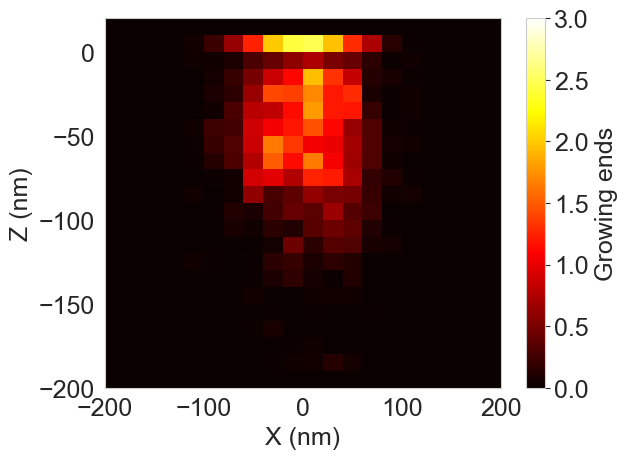

In [12]:
#GROWING ENDS, FINAL TIME POINT

plt.figure()
plt.pcolormesh(xs, ys, model_points_growing)
plt.clim([0, 3])
plt.colorbar(label = 'Growing ends')
plt.xlabel('X (nm)')
plt.ylabel('Z (nm)')

if save_figures == 'yes':
    if dark_plot_style == True:
        plt.savefig(figures_dir+pref+'_growing_plus_ends_map_XZ_time_subplots_colorbar_dark.png')
    else:
        plt.savefig(figures_dir+pref+'_growing_plus_ends_map_XZ_time_subplots_colorbar.png')

plt.show()

/var/folders/11/8gtfx9cs2hb867jn_szdst680000gn/T/ipykernel_48758/2062565831.py:35: RuntimeWarning: invalid value encountered in divide
  model_points_capped=model_points_capped/len(runs)/times_per_timept


<Figure size 640x480 with 0 Axes>

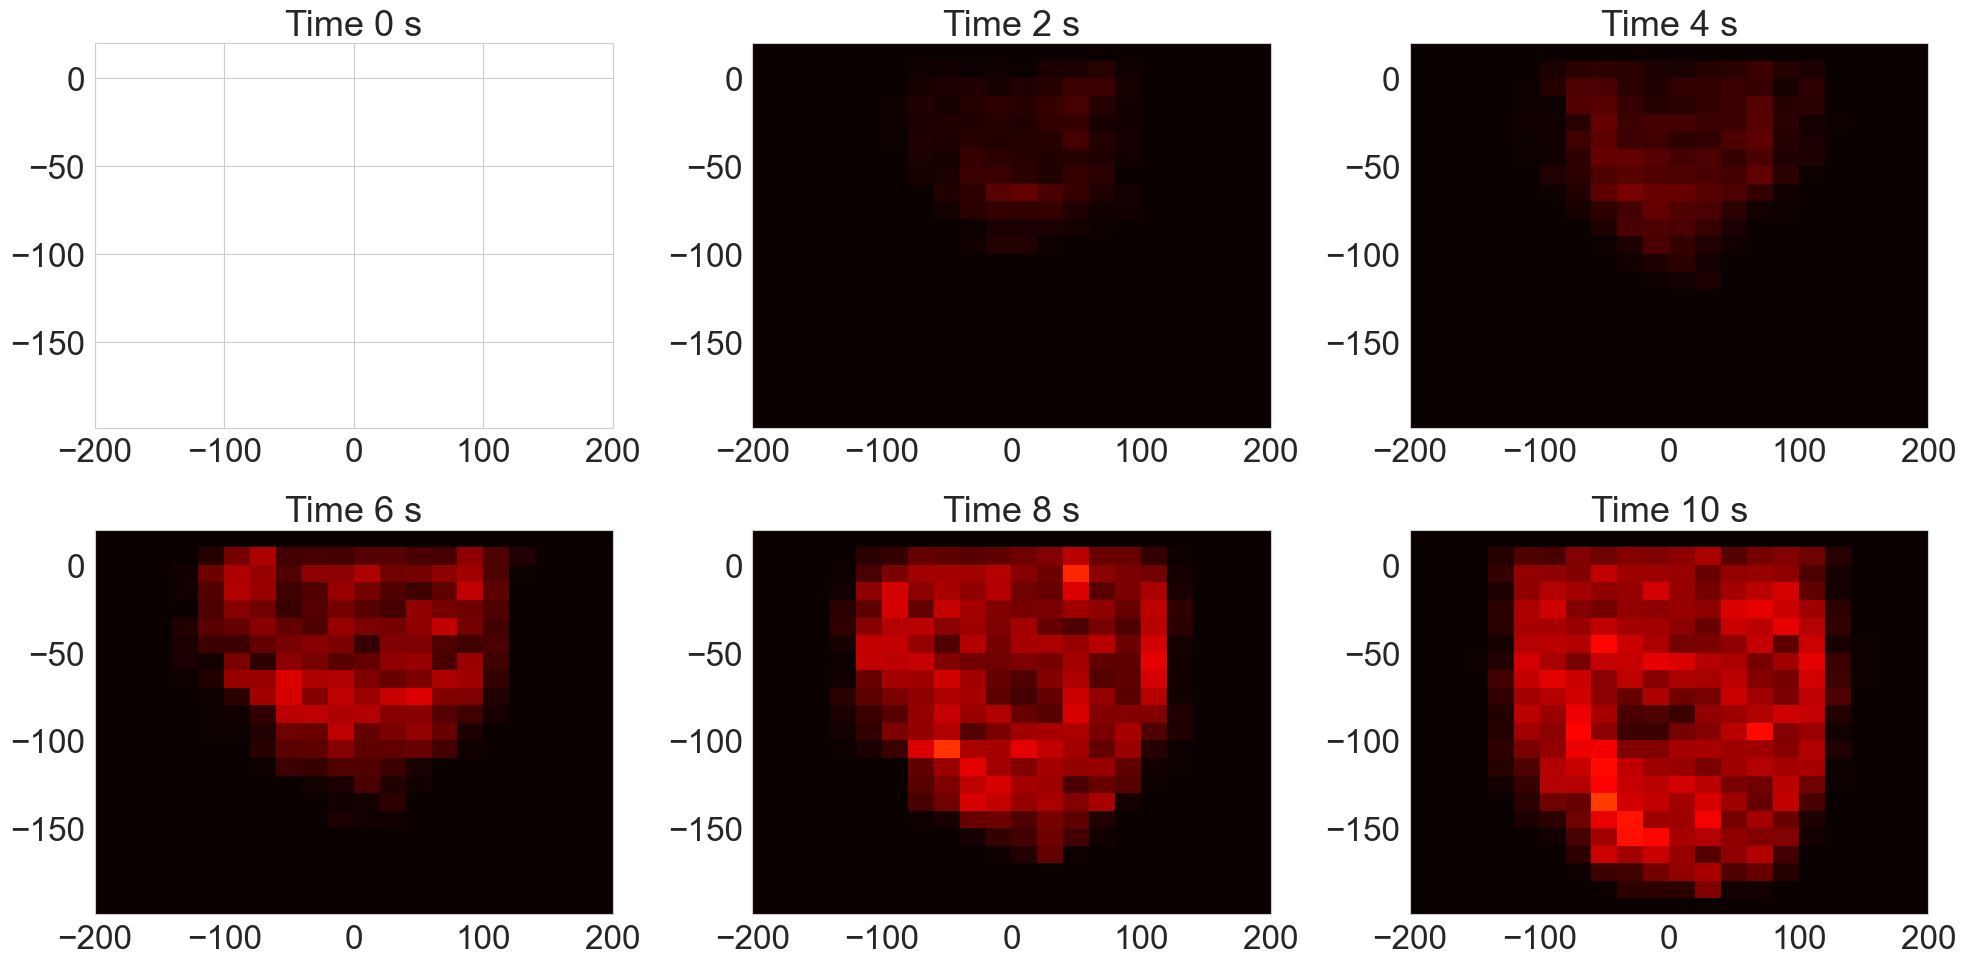

In [13]:
#CAPPED ENDS, MULTIPLE TIME POINTS

plt.colormaps.get_cmap('hot')
plt.set_cmap('hot')

fig = plt.figure(figsize=(20,10))

# plot one second intervals, show every other time point.

capped_ends_reindex = capped_ends.reset_index()

for i, timept in enumerate(range(0,11,2),start=0):

    # time bin is times in timepoint-1s to timepoint
    capped_ends_time=capped_ends_reindex.loc[capped_ends_reindex['time']>(timept-1)].loc[capped_ends_reindex['time']<=(timept)]

    # calculate # of unique runs in dataset and number of times in time bin
    runs = sorted(list(set(capped_ends_time.run)), key = lambda x:int(x[-2:]))
    times_per_timept=len(sorted(list(set(capped_ends_time.time))))

    # set number of bins (kind of like pixel size) here. 

    # x: 400 nm, 20 bins is 20 nm pixel.
    # z: 220 nm, 22 bin is 10 nm pixel

    model_points_capped,xs,ys=np.histogram2d(capped_ends_time.plus_xpos_recal,capped_ends_time.plus_zpos_recal,
                                           bins=[20,22],range=[[-200,200],[-200, 20]])
    model_points_capped=np.flipud(np.rot90(model_points_capped))   

    # histogram (sum) for one time

    # histogram shows total number of actin ends at that point in space, overcounts for repeated runs and multiple time points
    # mean actin in terms of run and time: just divide by number runs and nb time points in time bin.

    model_points_capped=model_points_capped/len(runs)/times_per_timept
    
    # plot model points of capped ends

    plt.subplot(2, 3, i+1)

    plt.pcolormesh(xs, ys, model_points_capped)

    plt.title('Time ' + str(timept) + ' s', fontsize=26)

    plt.xlim([-200, 200])
    plt.ylim(bottom = -199)

    # max colormap to show
    plt.clim([0, 4])

    plt.xticks(size=24)
    plt.yticks(size=24)

    fig.set_tight_layout(True)

if save_figures == 'yes': 
    if dark_plot_style == True:
        plt.savefig(figures_dir+pref+'_capped_plus_ends_map_XZ_time_subplots_dark.png')
        plt.savefig(figures_dir+pref+'_capped_plus_ends_map_XZ_time_subplots_dark.pdf')
    else:
        plt.savefig(figures_dir+pref+'_capped_plus_ends_map_XZ_time_subplots.png')
        plt.savefig(figures_dir+pref+'_capped_plus_ends_map_XZ_time_subplots.pdf')

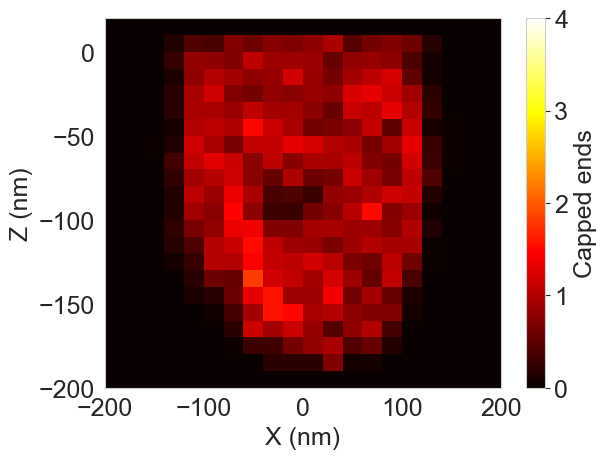

In [14]:
#CAPPED ENDS, FINAL TIME POINT

plt.figure()
plt.pcolormesh(xs, ys, model_points_capped)
plt.clim([0, 4])
plt.colorbar(label = 'Capped ends')
plt.xlabel('X (nm)')
plt.ylabel('Z (nm)')

if save_figures == 'yes': 
    if dark_plot_style == True:
        plt.savefig(figures_dir+pref+'_capped_plus_ends_map_XZ_time_subplots_colorbar_dark.png')
    else:
        plt.savefig(figures_dir+pref+'_capped_plus_ends_map_XZ_time_subplots_colorbar.png')

plt.show()

<Figure size 640x480 with 0 Axes>

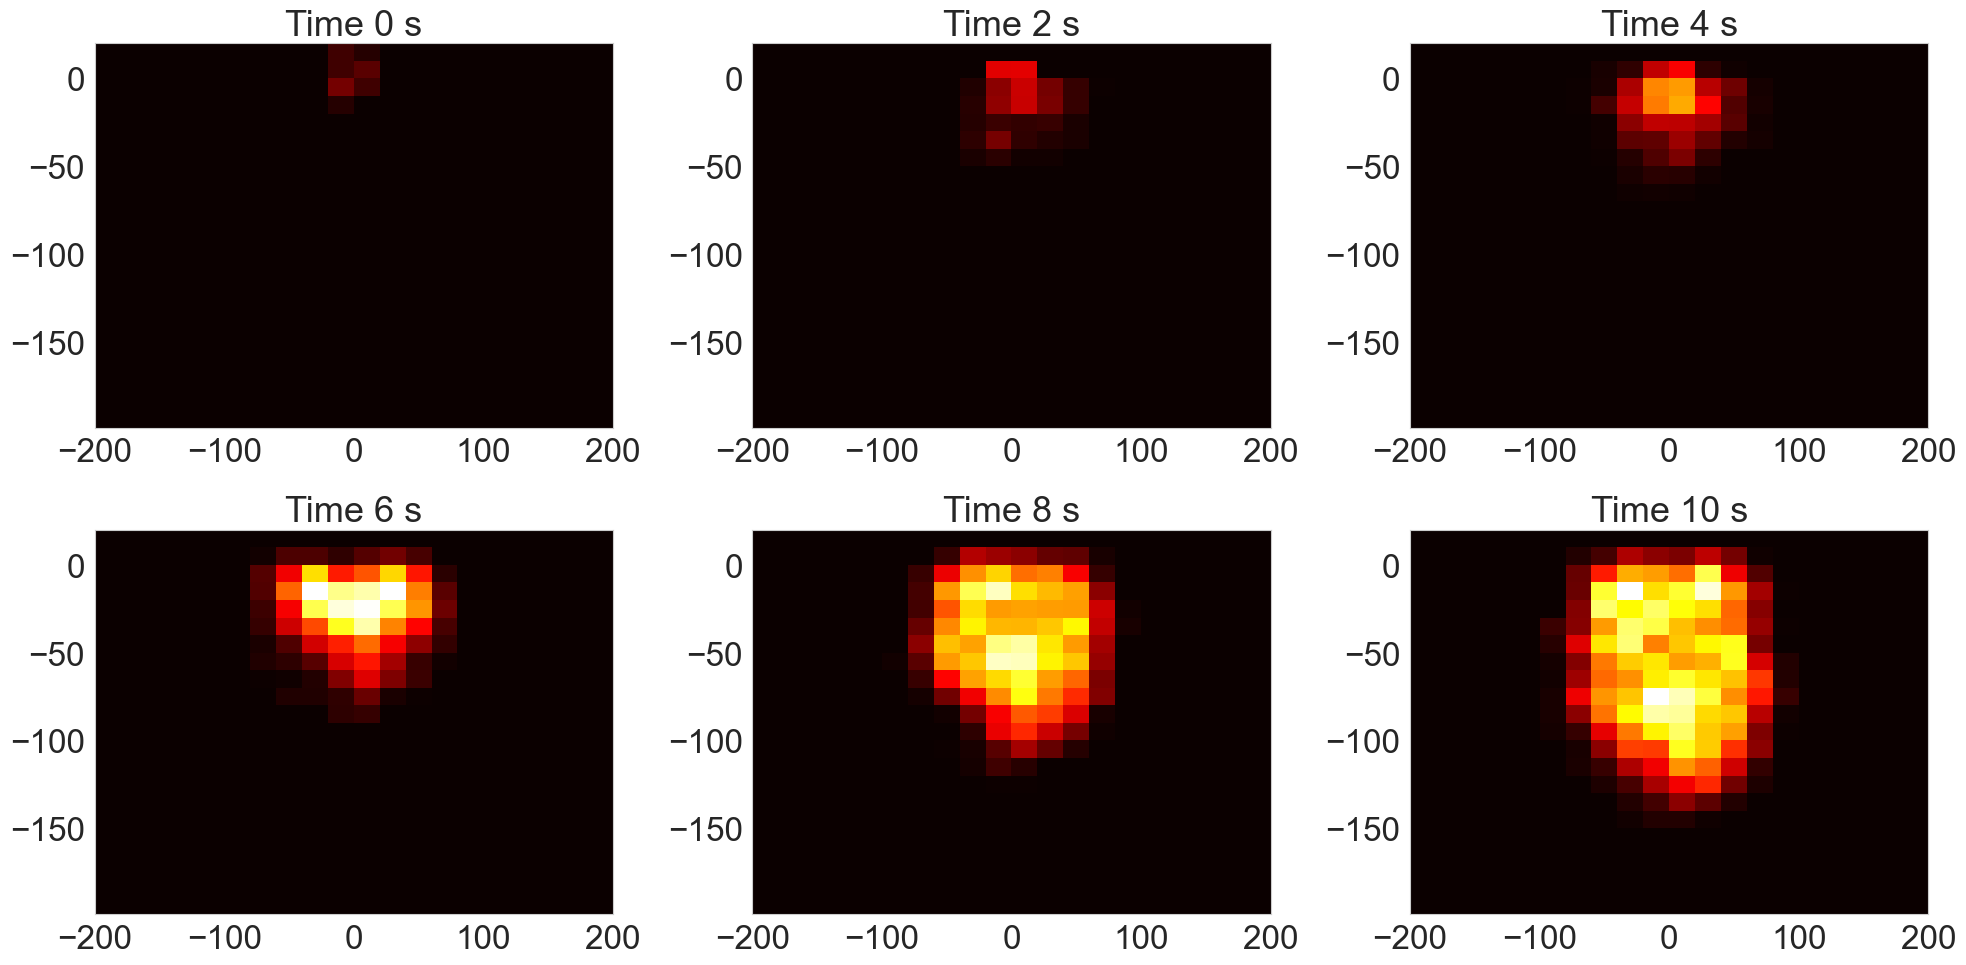

In [15]:
#MINUS ENDS, MULTIPLE TIME POINTS

plt.colormaps.get_cmap('hot')
plt.set_cmap('hot')

fig = plt.figure(figsize=(20,10))

# plot one second intervals, show every other time point.

actin_ends_reindex = actin_ends.reset_index()

for i, timept in enumerate(range(0,11,2),start=0):

    # time bin is times in timepoint-1s to timepoint
    actin_ends_time=actin_ends_reindex.loc[actin_ends_reindex['time']>(timept-1)].loc[actin_ends_reindex['time']<=(timept)]
    
    # calculate # of unique runs in dataset and number of times in time bin
    runs = sorted(list(set(actin_ends_time.run)), key = lambda x:int(x[-2:]))
    times_per_timept=len(sorted(list(set(actin_ends_time.time))))

    # set number of bins (kind of like pixel size) here. 

    # x: 400 nm, 20 bins is 20 nm pixel.
    # z: 220 nm, 22 bin is 10 nm pixel

    model_points_minus,xs,ys=np.histogram2d(actin_ends_time.minus_xpos_recal,actin_ends_time.minus_zpos_recal,
                                            bins=[20,22],range=[[-200,200],[-200, 20]])
    model_points_minus=np.flipud(np.rot90(model_points_minus))

    # histogram (sum) for one time

    # histogram shows total number of actin ends at that point in space, overcounts for repeated runs and multiple time points
    # mean actin in terms of run and time: just divide by number runs and nb time points in time bin.

    model_points_minus=model_points_minus/len(runs)/times_per_timept

    # plot model points of minus ends

    plt.subplot(2, 3, i+1)

    plt.pcolormesh(xs, ys, model_points_minus)

    plt.title('Time ' + str(timept) + ' s', fontsize=26)

    plt.xlim([-200, 200])
    plt.ylim(bottom = -199)

    # max colormap to show
    plt.clim([0, 5])

    plt.xticks(size=24)
    plt.yticks(size=24)

    fig.set_tight_layout(True)

if save_figures == 'yes': 
    if dark_plot_style == True:
        plt.savefig(figures_dir+pref+'_minus_ends_map_XZ_time_subplots_dark.png')
        plt.savefig(figures_dir+pref+'_minus_ends_map_XZ_time_subplots_dark.pdf')
    else:
        plt.savefig(figures_dir+pref+'_minus_ends_map_XZ_time_subplots.png')
        plt.savefig(figures_dir+pref+'_minus_ends_map_XZ_time_subplots.pdf')

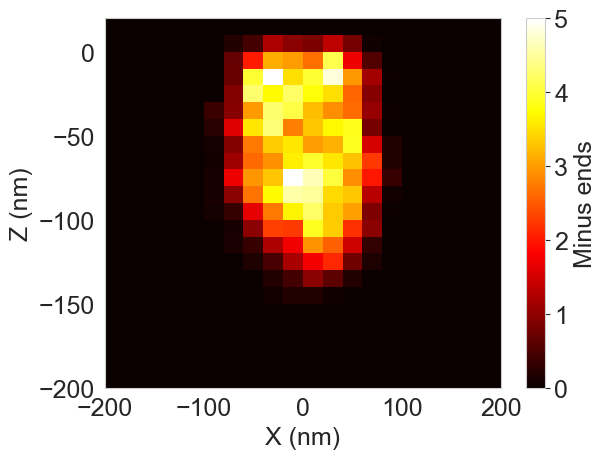

In [16]:
#MINUS ENDS, MULTIPLE TIME POINTS

plt.figure()
plt.pcolormesh(xs, ys, model_points_minus)
plt.clim([0, 5])
plt.colorbar(label = 'Minus ends')
plt.xlabel('X (nm)')
plt.ylabel('Z (nm)')

if save_figures == 'yes': 
    if dark_plot_style == True:
        plt.savefig(figures_dir+pref+'_minus_ends_map_XZ_time_subplots_colorbar_dark.png')
    else:
        plt.savefig(figures_dir+pref+'_minus_ends_map_XZ_time_subplots_colorbar.png')

plt.show()

## Heat maps of differences in plus/minus and growing/capped ends

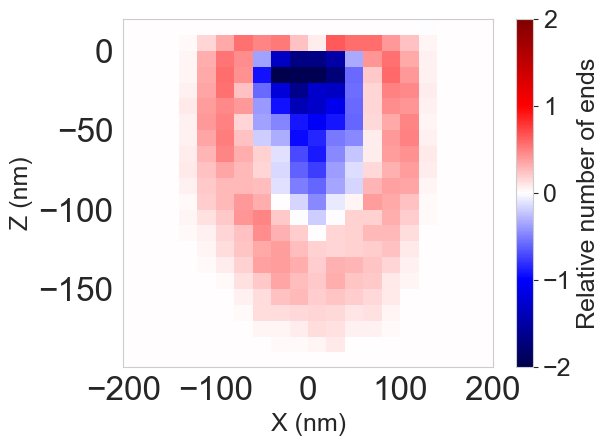

In [17]:
#PLUS ENDS - MINUS ENDS HEAT MAP, ALL TIME POINTS AVERAGED

plt.colormaps.get_cmap('seismic')
plt.set_cmap('seismic')

actin_ends_reindex = actin_ends.reset_index()

# set number of bins (kind of like pixel size) here. 

# x: 400 nm, 20 bins is 20 nm pixel.
# z: 220 nm, 22 bin is 10 nm pixel

model_points_plus,xs,ys=np.histogram2d(actin_ends_reindex.plus_xpos_recal,actin_ends_reindex.plus_zpos_recal,
                                       bins=[20,22],range=[[-200,200],[-200, 20]])
model_points_plus=np.flipud(np.rot90(model_points_plus))

model_points_minus,xs,ys=np.histogram2d(actin_ends_reindex.minus_xpos_recal,actin_ends_reindex.minus_zpos_recal,
                                        bins=[20,22],range=[[-200,200],[-200, 20]])
model_points_minus=np.flipud(np.rot90(model_points_minus))    

# histogram shows total number of actin ends at that point in space, overcounts for repeated runs and multiple time points
# mean actin in terms of run and time: just divide by number runs and nb time points in simulation.

model_points_plus=model_points_plus/len(runs)/len(times)
model_points_minus=model_points_minus/len(runs)/len(times)

# difference between plus and minus ends, positive is more plus ends

ends_plus_over_minus = model_points_plus-model_points_minus

# plot model points of plus - minus ends

plt.pcolormesh(xs, ys, ends_plus_over_minus)

plt.xlim([-200, 200])
plt.ylim(bottom = -199)

# max colormap to show
plt.clim([-2, 2])

plt.colorbar(label = 'Relative number of ends')

plt.xlabel('X (nm)')
plt.ylabel('Z (nm)')

plt.xticks(size=24)
plt.yticks(size=24)

plt.tight_layout()

if save_figures == 'yes': 
    if dark_plot_style == True:
        plt.savefig(figures_dir+pref+'_plusminus_ends_map_XZ_seismic.png')
        plt.savefig(figures_dir+pref+'_plusminus_ends_map_XZ_seismic.pdf')
    else:
        plt.savefig(figures_dir+pref+'_plusminus_ends_map_XZ_seismic.png')
        plt.savefig(figures_dir+pref+'_plusminus_ends_map_XZ_seismic.pdf')

plt.show()

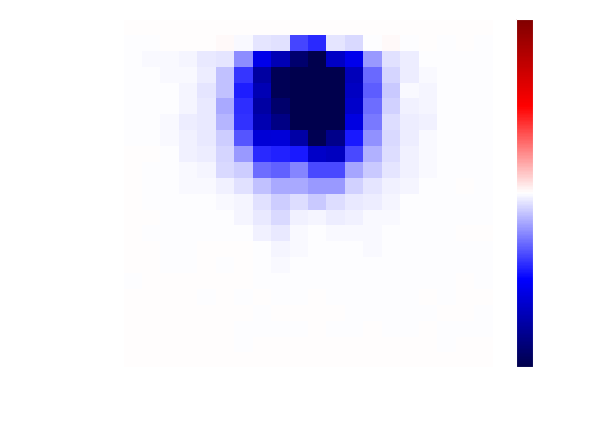

In [44]:
#GROWING ENDS - CAPPED ENDS HEAT MAP,  ALL TIME POINTS AVERAGED

plt.set_cmap('seismic')
plt.style.use('dark_background')

growing_ends_reindex = growing_ends.reset_index()
capped_ends_reindex = capped_ends.reset_index()

# set number of bins (kind of like pixel size) here. 

# x: 400 nm, 20 bins is 20 nm pixel.
# z: 220 nm, 22 bin is 10 nm pixel

model_points_growing,xs,ys=np.histogram2d(growing_ends_reindex.plus_xpos_recal,growing_ends_reindex.plus_zpos_recal,
                                          bins=[20,22],range=[[-200,200],[-200, 20]])
model_points_growing=np.flipud(np.rot90(model_points_growing))

model_points_capped,xs,ys=np.histogram2d(capped_ends_reindex.minus_xpos_recal,capped_ends_reindex.minus_zpos_recal,
                                         bins=[20,22],range=[[-200,200],[-200, 20]])
model_points_capped=np.flipud(np.rot90(model_points_capped))    

# histogram shows total number of actin ends at that point in space, overcounts for repeated runs and multiple time points
# mean actin in terms of run and time: just divide by number runs and nb time points in simulation.

model_points_growing=model_points_growing/len(runs)/len(times)
model_points_capped=model_points_capped/len(runs)/len(times)

# difference between growing and capped ends, positive is more growing ends

ends_growing_over_capped = model_points_growing-model_points_capped

# plot model points of growing - capped ends

plt.pcolormesh(xs, ys, ends_growing_over_capped)

plt.xlim([-200, 200])
plt.ylim(bottom = -199)

# max colormap to show
plt.clim([-2, 2])

plt.colorbar(label = 'Growing end enrichment score')

plt.xlabel('X (nm)')
plt.ylabel('Z (nm)')

plt.xticks(size=24)
plt.yticks(size=24)

plt.tight_layout()

if save_figures == 'yes':
    if dark_plot_style == True:
        plt.savefig(figures_dir+pref+'_growingcapped_diff_map_XZ_seismic_dark.png')
        plt.savefig(figures_dir+pref+'_growingcapped_diff_map_XZ_seismic_dark.pdf')
    else:
        plt.savefig(figures_dir+pref+'_growingcapped_diff_map_XZ_seismic.png')
        plt.savefig(figures_dir+pref+'_growingcapped_diff_map_XZ_seismic.pdf')

plt.show()

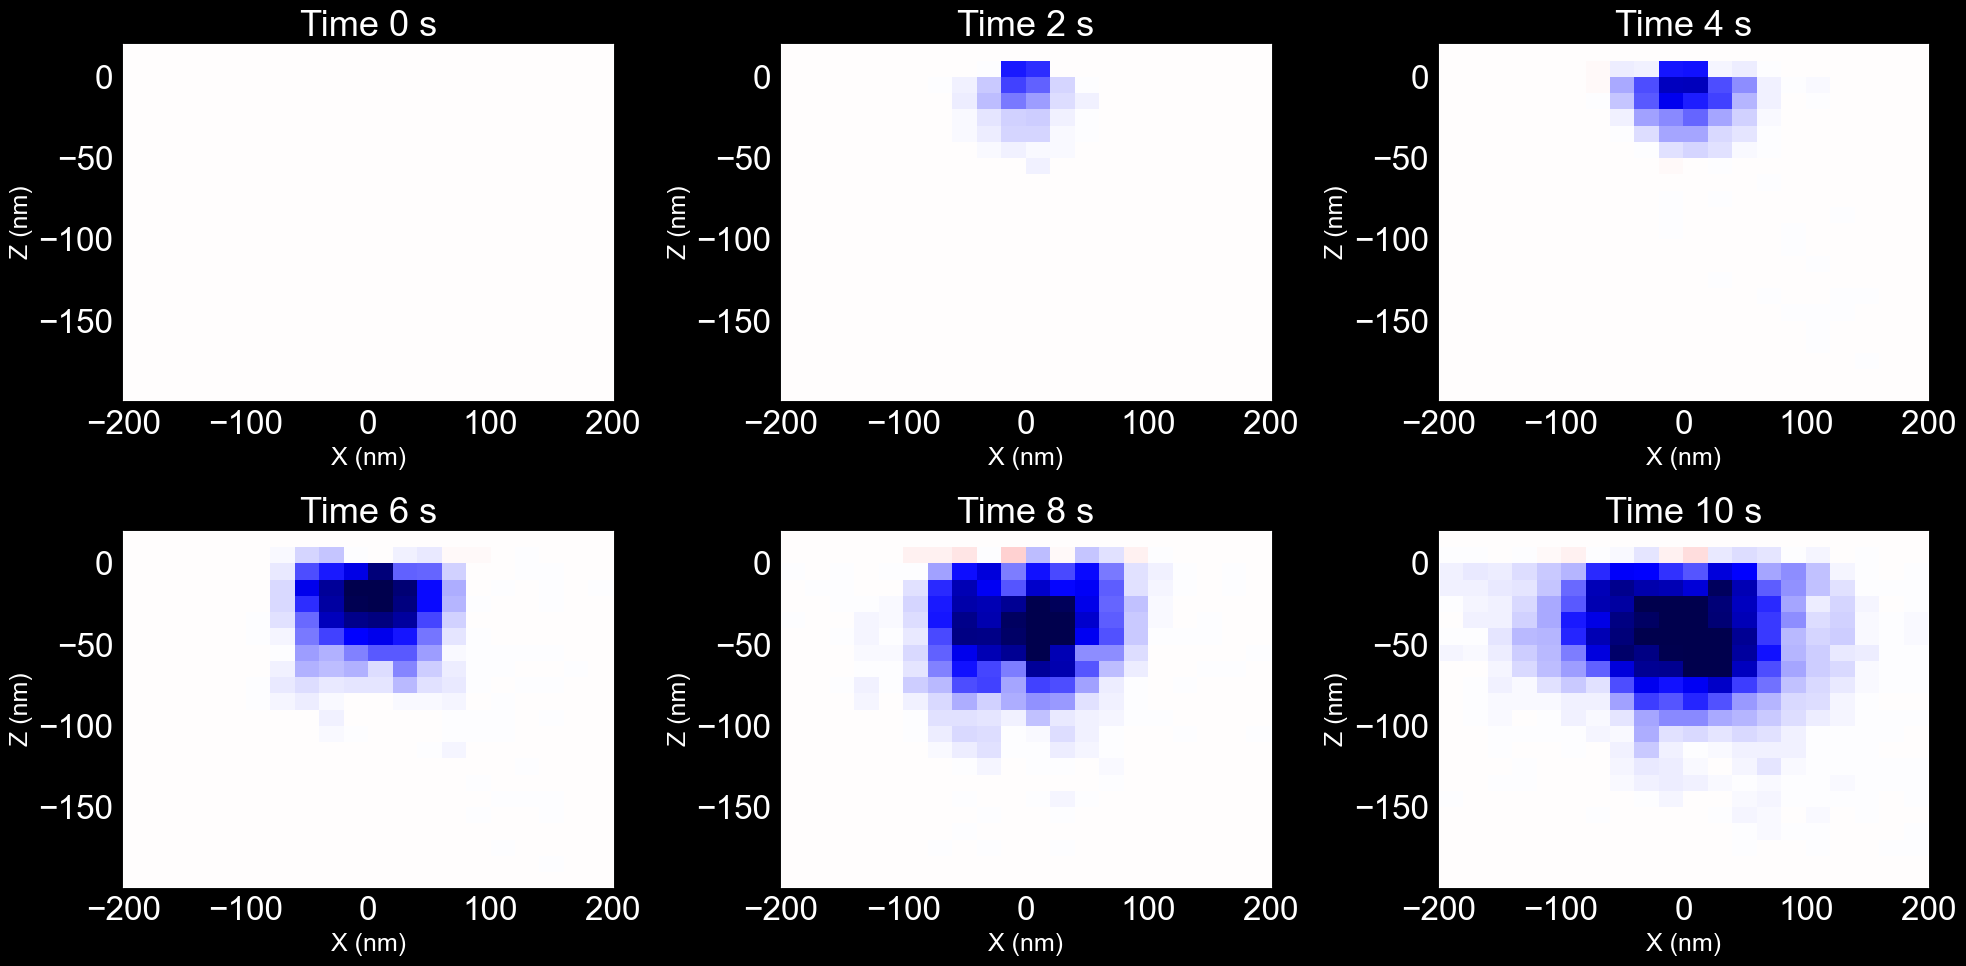

In [45]:
#GROWING ENDS MINUS CAPPED ENDS HEAT MAP, MULTIPLE TIME POINTS

fig = plt.figure(figsize=(20,10))

plt.set_cmap('seismic')

growing_ends_reindex = growing_ends.reset_index()
capped_ends_reindex = capped_ends.reset_index()

for i, timept in enumerate(range(0,11,2),start=0):

    # time bin is times in timepoint-1s to timepoint
    growing_ends_time=growing_ends_reindex.loc[growing_ends_reindex['time']>(timept-1)].loc[growing_ends_reindex['time']<=(timept)]
    capped_ends_time=capped_ends_reindex.loc[capped_ends_reindex['time']>(timept-1)].loc[capped_ends_reindex['time']<=(timept)]

    # calculate # of unique runs in dataset and number of times in time bin
    runs = sorted(list(set(actin_ends_time.run)), key = lambda x:int(x[-2:]))
    times_per_timept=len(sorted(list(set(actin_ends_time.time))))
    
    # set number of bins (kind of like pixel size) here. 

    # x: 400 nm, 20 bins is 20 nm pixel.
    # z: 220 nm, 22 bin is 10 nm pixel

    model_points_growing,xs,ys=np.histogram2d(growing_ends_time.plus_xpos_recal,growing_ends_time.plus_zpos_recal,
                                              bins=[20,22],range=[[-200,200],[-200, 20]])
    model_points_growing=np.flipud(np.rot90(model_points_growing))

    model_points_capped,xs,ys=np.histogram2d(capped_ends_time.minus_xpos_recal,capped_ends_time.minus_zpos_recal,
                                             bins=[20,22],range=[[-200,200],[-200, 20]])
    model_points_capped=np.flipud(np.rot90(model_points_capped))    

    # histogram shows total number of actin ends at that point in space, overcounts for repeated runs and multiple time points
    # mean actin in terms of run and time: just divide by number runs and nb time points in time bin.

    model_points_growing=model_points_growing/len(runs)/times_per_timept
    model_points_capped=model_points_capped/len(runs)/times_per_timept

    # difference between growing and capped ends, positive is more growing ends

    ends_growing_over_capped = model_points_growing-model_points_capped

    # plot model points of growing - capped ends
    
    plt.subplot(2, 3, i+1)

    plt.pcolormesh(xs, ys, ends_growing_over_capped)

    plt.title('Time ' + str(timept) + ' s', fontsize=26)

    plt.xlim([-200, 200])
    plt.ylim(bottom = -199)

    # max colormap to show
    plt.clim([-4, 4])

    plt.xlabel('X (nm)')
    plt.ylabel('Z (nm)')

    plt.xticks(size=24)
    plt.yticks(size=24)

    fig.set_tight_layout(True)

if save_figures == 'yes': 
    if dark_plot_style == True:
        plt.savefig(figures_dir+pref+'_growingcapped_diff_map_XZ_seismic_subplots_dark.png')
        plt.savefig(figures_dir+pref+'_growingcapped_diff_map_XZ_seismic_subplots_dark.pdf')
    else:
        plt.savefig(figures_dir+pref+'_growingcapped_diff_map_XZ_seismic_subplots.png')
        plt.savefig(figures_dir+pref+'_growingcapped_diff_map_XZ_seismic_subplots.pdf')

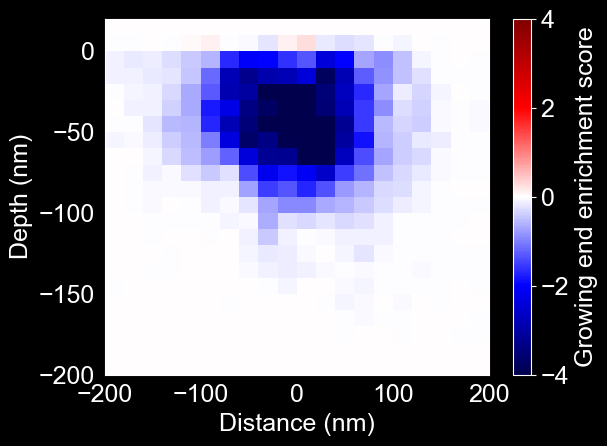

In [46]:
#GROWING ENDS MINUS CAPPED ENDS HEAT MAP, FINAL TIME POINT

plt.figure()
plt.pcolormesh(xs, ys, ends_growing_over_capped)
plt.clim([-4, 4])
plt.colorbar(label = 'Growing end enrichment score')
plt.xlabel('Distance (nm)')
plt.ylabel('Depth (nm)')
plt.tight_layout()

if save_figures == 'yes': 
    if dark_plot_style == True:
        plt.savefig(figures_dir+pref+'_growingcapped_diff_map_XZ_seismic_subplots_colorbar_dark.png')
        plt.savefig(figures_dir+pref+'_growingcapped_diff_map_XZ_seismic_subplots_colorbar_dark.pdf')
    else:
        plt.savefig(figures_dir+pref+'_growingcapped_diff_map_XZ_seismic_subplots_colorbar.png')
        plt.savefig(figures_dir+pref+'_growingcapped_diff_map_XZ_seismic_subplots_colorbar.pdf')

plt.show()

## Axial orientation plots

/var/folders/11/8gtfx9cs2hb867jn_szdst680000gn/T/ipykernel_48758/3052900543.py:28: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


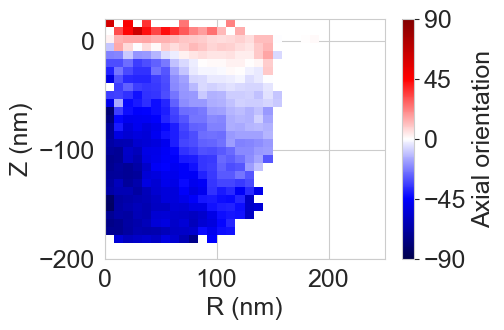

In [21]:
#AXIAL ORIENTATION OF PLUS ENDS, ALL TIME POINTS AVERAGED

fig = plt.figure(figsize=[5,4])
ax = fig.add_axes([0.2, 0.2, 0.7, 0.6])

plt.set_cmap('seismic')

color = actin_ends.zdir_deg_flip90

bin_means, xedges, yedges, binnumbers = binned_statistic_2d(actin_ends.plus_rpos_recal, actin_ends.plus_zpos_recal,
                                                            color, bins=30, statistic='mean', range = [[0,250],[-200,20]])
bin_means = np.flipud(np.rot90(bin_means))

# bin_means is average rotational orientation of filament ends binned in r and z

# plot rotational orientations of filament plus ends

plt.pcolormesh(xedges, yedges, bin_means)

cbar = plt.colorbar(label = 'Axial orientation')
plt.clim([-90,90])
cbar.set_ticks([-90, -45, 0, 45, 90])
plt.xticks([0, 100, 200])
plt.xlabel('R (nm)')
plt.ylabel('Z (nm)')
plt.ylim([-200,20])

plt.tight_layout()

if save_figures=='yes':
    if dark_plot_style == True:
        plt.savefig(figures_dir+pref+'_axial_orientation_RZ_dark.pdf')
        plt.savefig(figures_dir+pref+'_axial_orientation_RZ_dark.png')
    else:
        plt.savefig(figures_dir+pref+'_axial_orientation_RZ.pdf')
        plt.savefig(figures_dir+pref+'_axial_orientation_RZ.png')

plt.show()

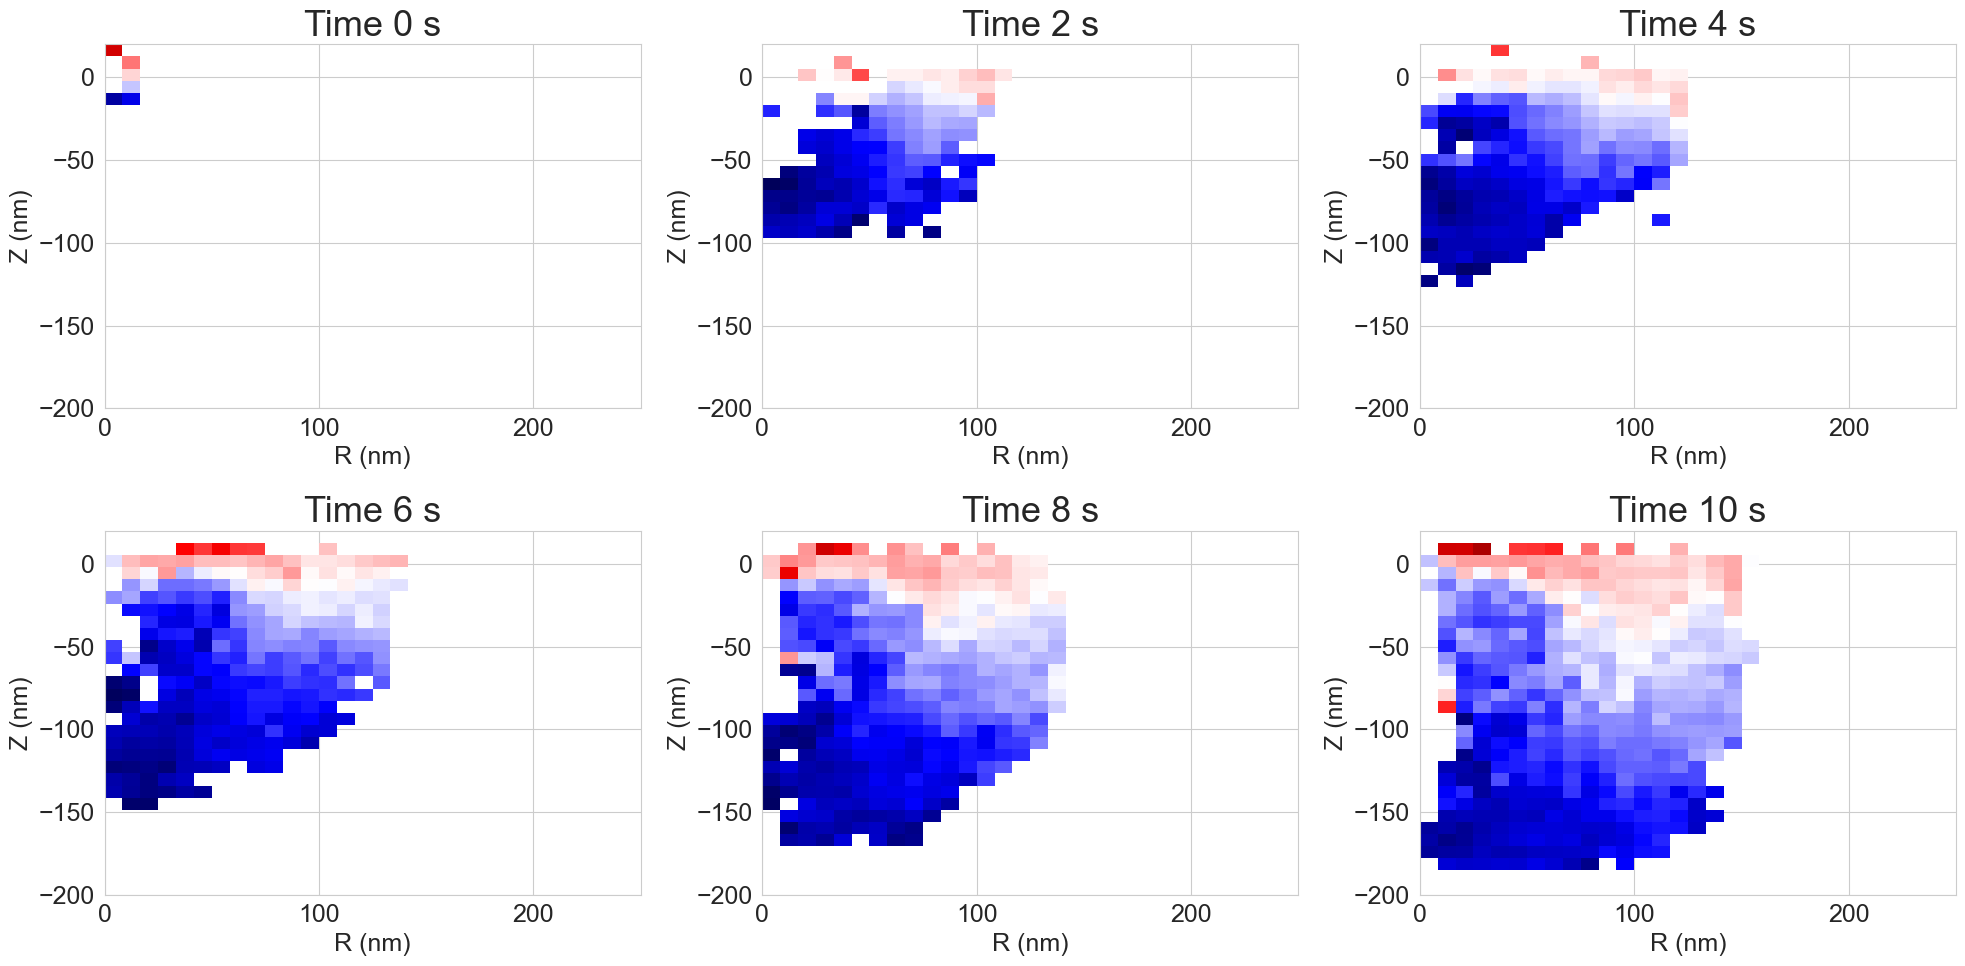

In [22]:
#AXIAL ORIENTATION OF PLUS ENDS, MULTIPLE TIME POINTS

fig = plt.figure(figsize=(20,10))

plt.set_cmap('seismic')

for i, timept in enumerate(range(0,11,2),start=0):

    # time bin is times in timepoint-1s to timepoint
    actin_ends_time=actin_ends_reindex.loc[actin_ends_reindex['time']>(timept-1)].loc[actin_ends_reindex['time']<=(timept)]

    color = actin_ends_time.zdir_deg_flip90

    bin_means, xedges, yedges, binnumbers = binned_statistic_2d(actin_ends_time.plus_rpos_recal, actin_ends_time.plus_zpos_recal,
                                                                color, bins=30, statistic='mean', range = [[0,250],[-200,20]])
    bin_means = np.flipud(np.rot90(bin_means))

    # bin_means is average rotational orientation of filament ends binned in r and z
    
    # plot rotational orientations of filament ends

    plt.subplot(2, 3, i+1)

    plt.pcolormesh(xedges, yedges, bin_means)

    plt.title('Time ' + str(timept) + ' s', fontsize=26)

    plt.clim([-90,90])
    plt.xticks([0, 100, 200])
    plt.xlabel('R (nm)')
    plt.ylabel('Z (nm)')
    plt.ylim([-200,20])

    fig.set_tight_layout(True)

if save_figures=='yes':
    if dark_plot_style == True:
        plt.savefig(figures_dir+pref+'_axial_orientation_RZ_subplots_dark.pdf')
        plt.savefig(figures_dir+pref+'_axial_orientation_RZ_subplots_dark.png')
    else:
        plt.savefig(figures_dir+pref+'_axial_orientation_RZ_subplots.pdf')
        plt.savefig(figures_dir+pref+'_axial_orientation_RZ_subplots.png')

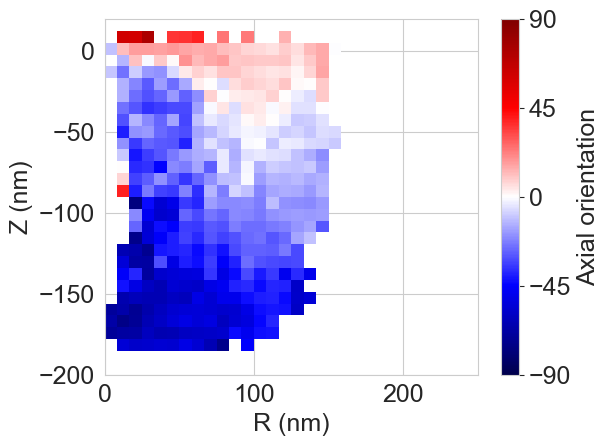

In [23]:
#AXIAL ORIENTATION OF PLUS ENDS, FINAL TIME POINT

plt.figure()
plt.pcolormesh(xedges, yedges, bin_means)
plt.clim([-90, 90])
cbar = plt.colorbar(label = 'Axial orientation')
cbar.set_ticks([-90, -45, 0, 45, 90])
plt.xticks([0, 100, 200])
plt.xlabel('R (nm)')
plt.ylabel('Z (nm)')
plt.ylim([-200,20])
plt.tight_layout()

if save_figures == 'yes': 
    if dark_plot_style == True:
        plt.savefig(figures_dir+pref+'_axial_orientation_RZ_subplots_colorbar_dark.png')
    else:
        plt.savefig(figures_dir+pref+'_axial_orientation_RZ_subplots_colorbar.png')

plt.show()

/var/folders/11/8gtfx9cs2hb867jn_szdst680000gn/T/ipykernel_48758/377678205.py:28: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


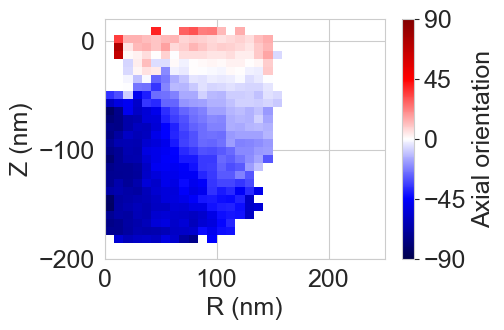

In [24]:
#AXIAL ORIENTATION OF CAPPED ENDS, ALL TIME POINTS AVERAGED

fig = plt.figure(figsize=[5,4])
ax = fig.add_axes([0.2, 0.2, 0.7, 0.6])

plt.set_cmap('seismic')

color = capped_ends.zdir_deg_flip90

bin_means, xedges, yedges, binnumbers = binned_statistic_2d(capped_ends.plus_rpos_recal, capped_ends.plus_zpos_recal,
                                                            color, bins=30, statistic='mean', range = [[0,250],[-200,20]])
bin_means = np.flipud(np.rot90(bin_means))

# bin_means is average rotational orientation of filament ends binned in r and z

# plot rotational orientations of capped filament ends

plt.pcolormesh(xedges, yedges, bin_means)

cbar = plt.colorbar(label = 'Axial orientation')
plt.clim([-90,90])
cbar.set_ticks([-90, -45, 0, 45, 90])
plt.xticks([0, 100, 200])
plt.xlabel('R (nm)')
plt.ylabel('Z (nm)')
plt.ylim([-200,20])

plt.tight_layout()

if save_figures=='yes':
    if dark_plot_style == True:
        plt.savefig(figures_dir+pref+'_axial_orientation_capped_RZ_dark.pdf')
        plt.savefig(figures_dir+pref+'_axial_orientation_capped_RZ_dark.png')
    else:
        plt.savefig(figures_dir+pref+'_axial_orientation_capped_RZ.pdf')
        plt.savefig(figures_dir+pref+'_axial_orientation_capped_RZ.png')

plt.show()

/var/folders/11/8gtfx9cs2hb867jn_szdst680000gn/T/ipykernel_48758/160416691.py:28: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


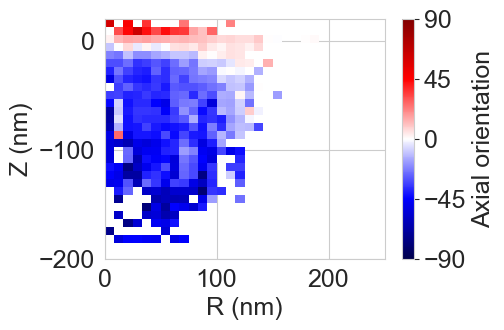

In [25]:
#AXIAL ORIENTATION OF GROWING ENDS, ALL TIME POINTS AVERAGED

fig = plt.figure(figsize=[5,4])
ax = fig.add_axes([0.2, 0.2, 0.7, 0.6])

plt.set_cmap('seismic')

color = growing_ends.zdir_deg_flip90

bin_means, xedges, yedges, binnumbers = binned_statistic_2d(growing_ends.plus_rpos_recal, growing_ends.plus_zpos_recal,
                                                            color, bins=30, statistic='mean', range = [[0,250],[-200,20]])
bin_means = np.flipud(np.rot90(bin_means))

# bin_means is average rotational orientation of filament ends binned in r and z

# plot rotational orientations of growing filament ends

plt.pcolormesh(xedges, yedges, bin_means)

cbar = plt.colorbar(label = 'Axial orientation')
plt.clim([-90,90])
cbar.set_ticks([-90, -45, 0, 45, 90])
plt.xticks([0, 100, 200])
plt.xlabel('R (nm)')
plt.ylabel('Z (nm)')
plt.ylim([-200,20])

plt.tight_layout()

if save_figures=='yes':
    if dark_plot_style == True:
        plt.savefig(figures_dir+pref+'_axial_orientation_growing_RZ_dark.pdf')
        plt.savefig(figures_dir+pref+'_axial_orientation_growing_RZ_dark.png')
    else:
        plt.savefig(figures_dir+pref+'_axial_orientation_growing_RZ.pdf')
        plt.savefig(figures_dir+pref+'_axial_orientation_growing_RZ.png')

plt.show()

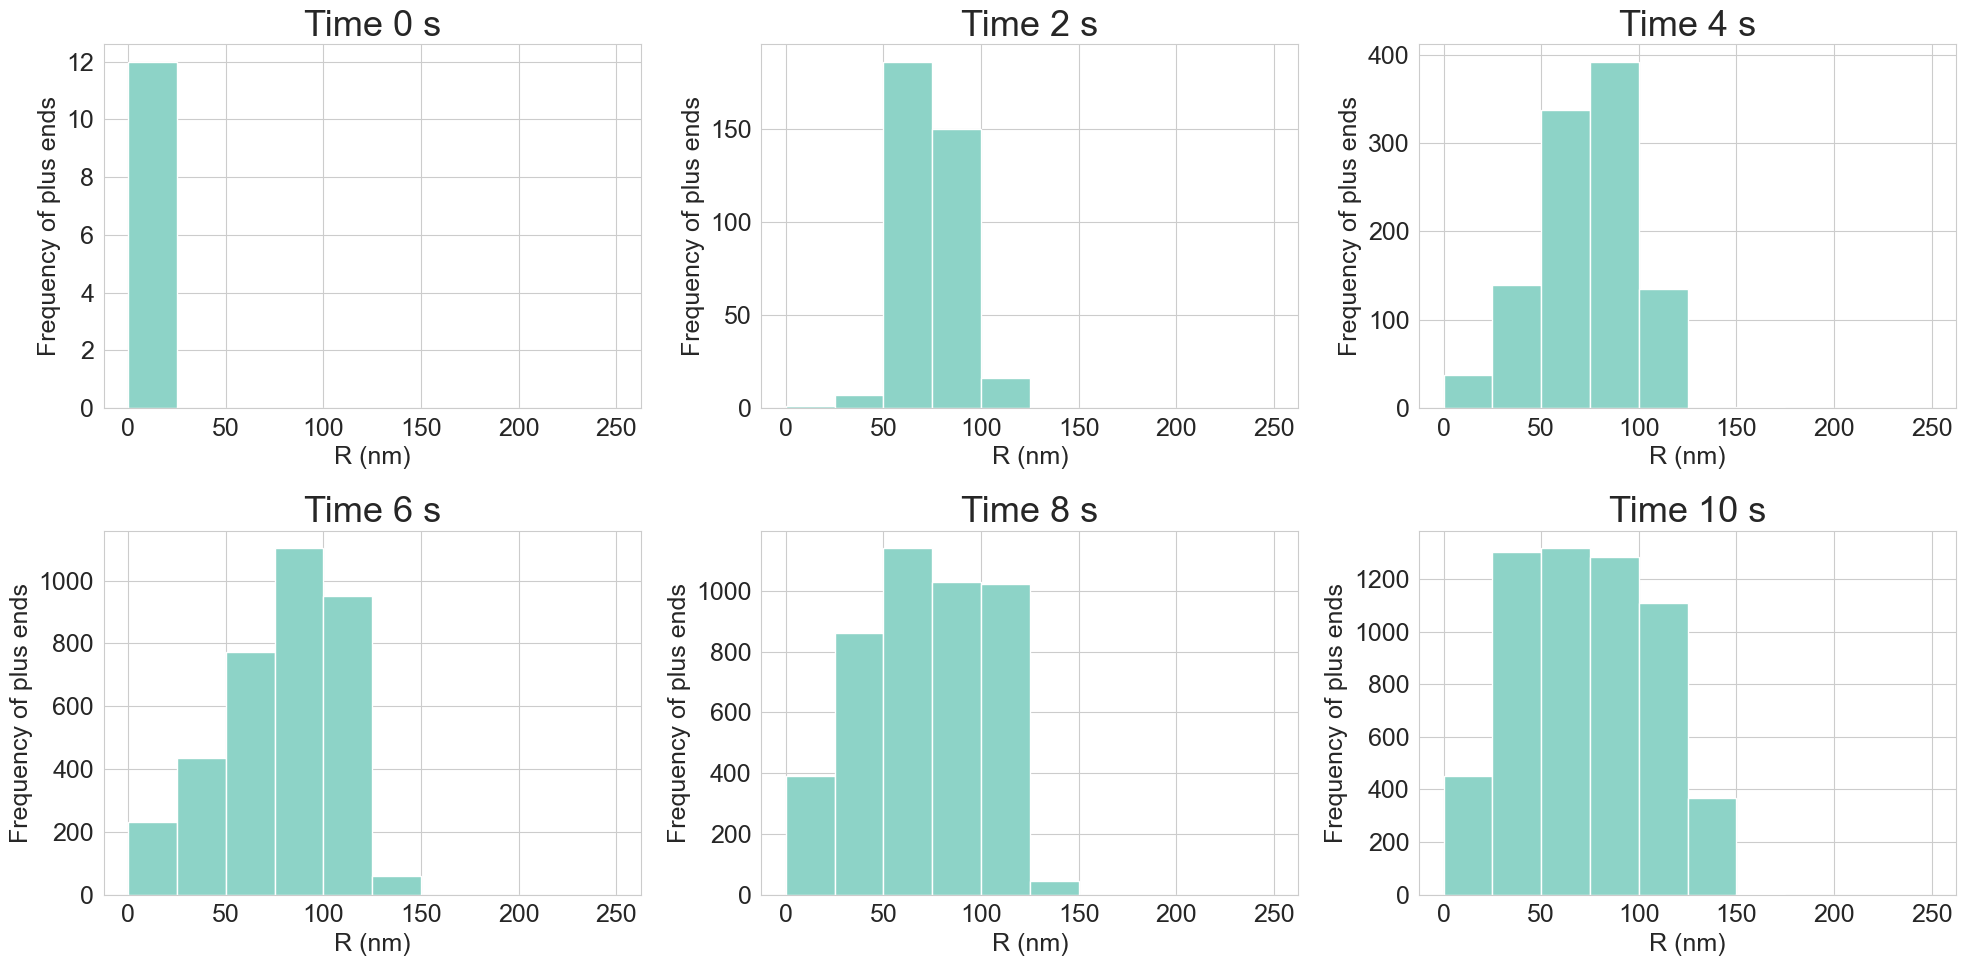

In [26]:
#HISTOGRAM OF RADIAL POSITIONS OF PLUS ENDS, ALL TIME POINTS

fig = plt.figure(figsize=(20,10))

plt.set_cmap('seismic')

for i, timept in enumerate(range(0,11,2),start=0):

    # time bin is times in timepoint-1s to timepoint
    actin_ends_time=actin_ends_reindex.loc[actin_ends_reindex['time']>(timept-1)].loc[actin_ends_reindex['time']<=(timept)]

    # radial position of all actin ends within 10 nm of the membrane
    actin_ends_at_membrane = actin_ends_time.iloc[np.where(actin_ends_time['plus_zpos_recal']>-10)]['plus_rpos_recal']

    # plot radial positions as a histogram

    plt.subplot(2, 3, i+1)

    plt.hist(actin_ends_at_membrane, range = [0, 250],)

    plt.title('Time ' + str(timept) + ' s', fontsize=26)
    plt.xlabel('R (nm)')
    plt.ylabel('Frequency of plus ends')

    fig.set_tight_layout(True)

if save_figures=='yes':
    if dark_plot_style == True:
        plt.savefig(figures_dir+pref+'_axial_orientation_RZ_subplots_dark.pdf')
        plt.savefig(figures_dir+pref+'_axial_orientation_RZ_subplots_dark.png')
    else:
        plt.savefig(figures_dir+pref+'_axial_orientation_RZ_subplots.pdf')
        plt.savefig(figures_dir+pref+'_axial_orientation_RZ_subplots.png')

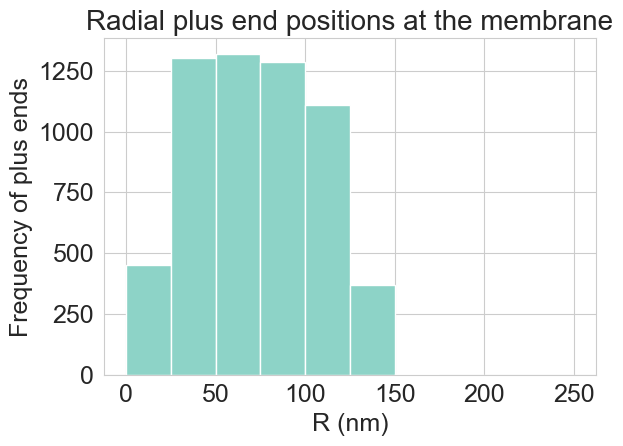

In [27]:
#HISTOGRAM OF RADIAL POSITIONS OF PLUS ENDS, FINAL TIME POINT

plt.figure()
plt.hist(actin_ends_at_membrane, range = [0, 250],)
plt.title('Radial plus end positions at the membrane')
plt.xlabel('R (nm)')
plt.ylabel('Frequency of plus ends')
plt.tight_layout()

plt.show()

if save_figures=='yes':
    actin_ends_at_membrane.to_csv(figures_dir+'plus_end_membrane_radial_pos.csv')

In [28]:
print('All done!')

All done!
